# **Veriye İlk Bakış**

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### **Veri Setinin Hikayesi Nedir?**

Veriye ilk bakış demek teorik olarak verisetinin nasıl oluştuğunun sorgulanmasıdır.

Bu veriseti NASA'nın yayınladığı galaksi keşfi ile ilgili bir veri setidir.<br>
* **method:** gezegenlerin/galaksilerin bulunma şeklini ifade etmektedir.
* **number:** bulunan sistemlerdeki gezegen sayısını ifade etmektedir.
* **orbital_period:** yörünge dönemini ifade etmektedir.
* **mass:** kütleyi ifade etmektedir.
* **distance:** uzaklığı ifade etmektedir.
* **year:** bulunma yılını ifade etmektedir.

In [2]:
df = planets.copy()
#Orjinal verisetini yedekleyerek yedek üzerinde işlemler yapacağız.

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### **Veri Seti Yapısal Bilgileri**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**object**'i gördüğümüz zaman bunun bir kategorik değişken olduğunu düşüneceğiz.<br>
object dışında diğer tüm değişkenler ise kesikli ve sürekli olan sayısal değişkenlerdir.

In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

**object tipindeki değişkeni Categorical tipine dönüştürmeliyiz.**

In [7]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# **Veri Setinin Betimlenmesi**

In [9]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()

In [10]:
df.shape #degisken ve gözlem sayısı

(1035, 6)

In [11]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [12]:
df.describe().T
#describe eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [13]:
df.describe(include = "all").T #kategorik değişkenleri de dahil eder ancak anlamlı sonuç çıkmaz.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


# **Eksik Değerlerin İncelenmesi**

In [14]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [15]:
#hiç eksik gözlem(değer) var mı?
df.isnull().values.any()

True

In [16]:
#Hangi değişkende kaçar tane eksik değer var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [17]:
#Eksik değerleri 0 ile doldurmak.
df["orbital_period"].fillna(0, inplace=True)

In [18]:
#orbital_period değişkenindeki eksik değerleri doldurduk.
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

Eksik veri doldurma işlemi çok tehlikelidir. Veri setinin yapısını bozabilir.

In [19]:
#Ortalama ile eksik değer doldurma
df["mass"].fillna(df.mass.mean(), inplace = True)

In [20]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [21]:
#Veri setindeki tüm eksik değerlerin yerine ortalamalarının atanması
df.fillna(df.mean, inplace = True)

In [22]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

Eksik değerleri doldurarak veri setinin yapısını bozduk.<br>
Copy metodu ile işlemleri geri alalım.

In [23]:
df = planets.copy()

In [24]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# **Kategorik Değişken Özetleri**

In [25]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### **Sadece Kategorik Değişkenler ve Özetleri**

In [26]:
#Kategorik değişkeni seçmek.
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


### **Kategorik Değişkenlerin Sınıflarına ve Sınıf Sayısına Erişmek**

In [27]:
#Değişkenin içerisindeki sınıf bilgileri
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [28]:
#Değişkenimizin kaç adet sınıfı olduğu
kat_df["method"].value_counts().count()

10

### **Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek**

In [29]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

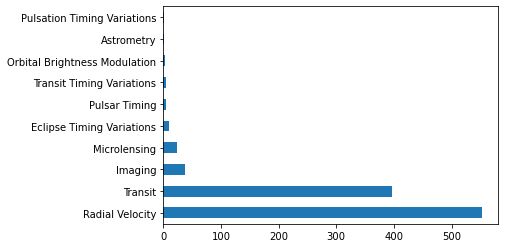

In [30]:
#Sınıfların frekanslarını sütun grafiği şeklinde görelim
df["method"].value_counts().plot.barh(); # ";" bilgi satırını kapatır.

# **Sürekli Değişken Özetleri**

In [31]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [32]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [33]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [35]:
#Sadece belirli bir değişkenin betimsel istatistiği
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [36]:
print("Ortalama: "+ str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: "+ str(df_num["distance"].count()))
print("Maks. Değer: "+ str(df_num["distance"].max()))
print("Min. Değer: "+ str(df_num["distance"].min()))
print("Medyan: "+ str(df_num["distance"].median()))
print("Standart Sapma: "+ str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maks. Değer: 8500.0
Min. Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


# **Dağılım Grafikleri**

### **Barplot** (Sütun Grafiği)

Sütun grafikler, elimizdeki categoric değişkenleri görselleştirmek için kullanılır.

**Veri Setinin Hikayesi**

* price: dolar cinsinden fiyat (326-18,823)
* carat: ağırlık (0.2-5.01)
* cut: kalite (Fair, Good, Very Good, Premium, Ideal)
* color: renk (from J(worst) to D(best))
* clarity: temizliği, berraklığı (I1(worst), SI2, VS2, VS1, VVS2, VVS1, IF(best))
* x: length in mm (0-10.74)
* y: width in mm (0-58.9)
* z: depth in mm (0-31.8)
* depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x+y) (43-79)
* table: elmasın en geniş noktasına göre genişliği (43-79)

In [37]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakış**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df["cut"].value_counts() #degiskendeki gozlemlerin frekansı

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [42]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Kategorik değişken görselleştirmek üzere ele aldığımız sütun grafiği işlemlerimize devam edeceğiz. Fakat şöyle bir problemimiz var; <br>elimizdeki veri setinin içerisindeki kategorik değişkenlerin nominal değil ordinal olduğunu gözlemliyoruz. <br>Sınıflar arasında kötüden iyiye gibi bir sıralama var.<br>Bizim bunu Python programlama diline ifade etmemiz lazım.<br>
Buradaki kategorik değişkenlerin type'ni ordered(sıralı) bir şekilde programa tanıtmalıyız.

In [43]:
#Ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [44]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [45]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
#cut değişkeninin tipini kategorik değişkene dönüştür.
#Ve bunu sıralı(ordinal) şekilde yap.

In [46]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [47]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

**cut** değişkeninin ordinal olduğunu tanıttık fakat sıralamayı yanlış yaptı.<br>
Sıralama bilgisini de vermemiz gerekiyor.

In [48]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [49]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [50]:
df.cut.head(1)
#Doğru sıralamaya ulaştık.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

Sütun grafiği oluşturmak üzere bölüme başladık, fakat tıpkı gerçek hayatta olduğu gibi elimizdeki veri<br>
(hazır bir kütüphaneden çektiğimiz halde) doğru bir formda değil. Kullanacak olduğumuz fonksiyonlara <br>
göndermek üzere hazır değil. Dolayısıyla bütün görselleştirme teknikleri işin en kolay kısmı. Zor olan<br>
kısmı ise bu detaylardaki teknik bazı zorlukların farkında olmak ve bunları giderecek yöntemleri bilmek.

In [51]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [52]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)
#Doğru sıralamaya ulaştık.

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [53]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [54]:
#(I1(worst), SI2, VS2, VS1, VVS2, VVS1, IF(best))
clarity_kategoriler = ["I1", "SI2", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))
df["clarity"].head(1)
#Doğru sıralamaya ulaştık.

0    SI2
Name: clarity, dtype: category
Categories (7, object): ['I1' < 'SI2' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

**Veri setinin hikayesi**, **veri setine ilk adımın atılması** ve **veri setinin görselleştirmeye hazır hale getirilmesi**<br>
işlemlerini gerçekleştirmiş olduk.

#### **Bar Plot (Sütun Grafiğin) Oluşturulması**

In [55]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

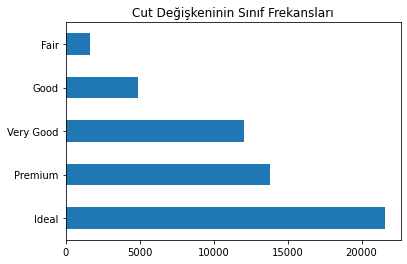

In [56]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

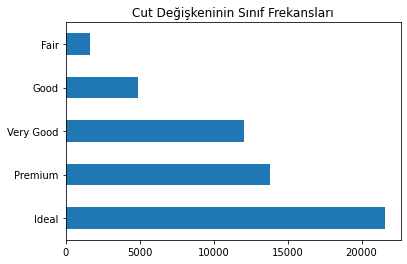

In [57]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

In [58]:
import seaborn as sns

In [59]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,NaN,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


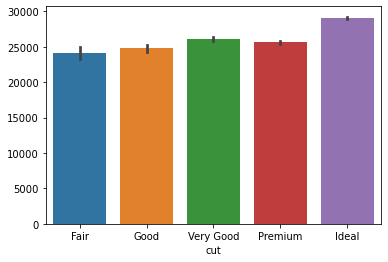

In [60]:
sns.barplot(x = "cut", y = df.cut.index, data=df);

### **Sütun Grafik Çaprazlamalar**

Bu bölümlerde ele aldığımız uygulamalar artık grafiklerin teknik özelliklerinin yanında <br>
bize daha detaylı, veriye değil de bilgiye erişmek için kullanacak olduğumuz yaklaşımlardır.

In [61]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [62]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

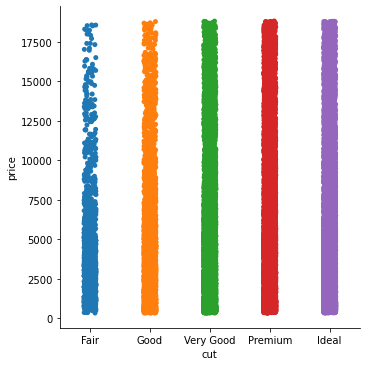

In [63]:
sns.catplot(x="cut", y="price", data=df);
#catplot grafiği ketagorik değişken çaprazlamak için kullanılır.

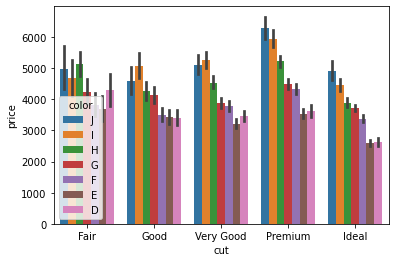

In [64]:
sns.barplot(x = "cut", y = "price", hue = "color", data=df);
#Bu grafik cut ve color'a göre gruplama yapar. Price değerlerinin ortalamasını ve std gösterir.

Grafikteki verileri doğrulayalım.

In [65]:
df.groupby(["cut", "color"])["price"].mean().unstack()

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,4975.655462,4685.445714,5135.683168,4239.254777,3827.003205,3682.312500,4291.061350
Good,4574.172638,5078.532567,4276.254986,4123.482204,3495.750275,3423.644159,3405.382175
Very Good,5103.513274,5255.879568,4535.390351,3872.753806,3778.820240,3214.652083,3470.467284
Premium,6294.591584,5946.180672,5216.706780,4500.742134,4324.890176,3538.914420,3631.292576
Ideal,4918.186384,4451.970377,3889.334831,3720.706388,3374.939362,2597.550090,2629.094566


### **Histogram ve Yoğunluk Grafiği**

Histogram ve yoğunluk grafikleri sayısal değişkenlerin dağılımını <br>
ifade etmek için kullanılan veri görselleştirme teknikleridir.

In [66]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


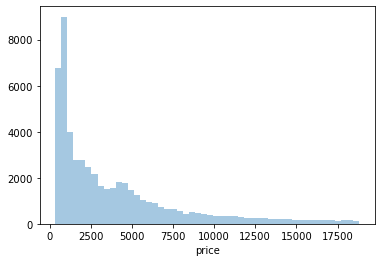

In [67]:
sns.distplot(df.price, kde=False);
#kde yoğunluk gösterir.

İki tepeli bir yapı oluştu. Bu çarpıklık olduğunu gösterir.

In [68]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

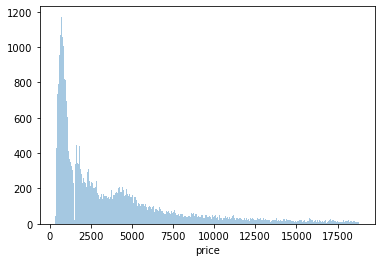

In [69]:
sns.distplot(df.price, bins = 500, kde=False);
#bins: histogramdaki çubuk sayısı

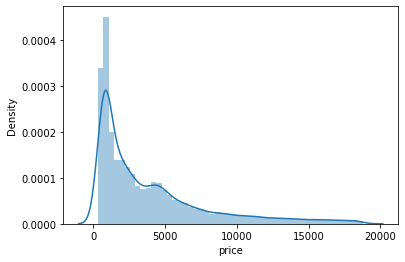

In [70]:
sns.distplot(df.price);
#histogram ve yoğunluk grafiği birlikte

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


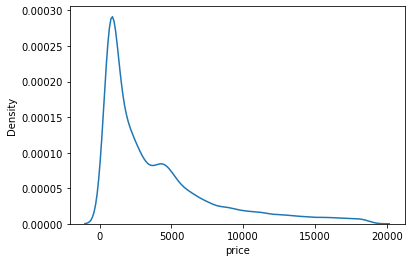

In [71]:
sns.distplot(df.price, hist = False);
#Sadece yoğunluk grafiği

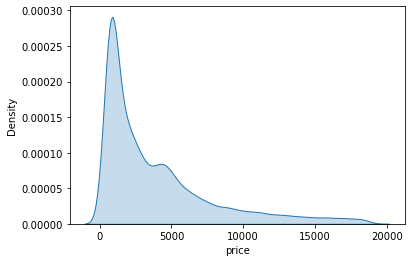

In [72]:
sns.kdeplot(df.price, shade = True);
#yoğunluk grafiğinin altını doldurarak oluşturduk.

### **Histogram ve Yoğunluk Çaprazlamalar**

In [73]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories=cut_kategoriler, ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [74]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

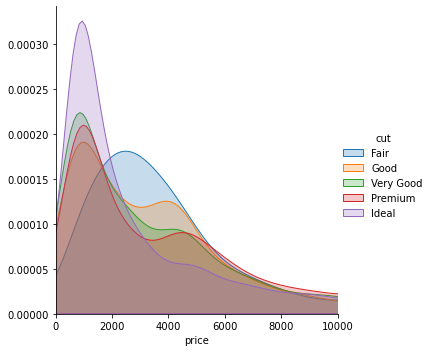

In [75]:
(sns
 .FacetGrid(df,
           hue="cut",
           height=5,
           xlim=(0,10000)) #x ekseninin bas.-bitis degerleri
 .map(sns.kdeplot, "price", shade=True)
 .add_legend() #kategorik bilgiler için
);

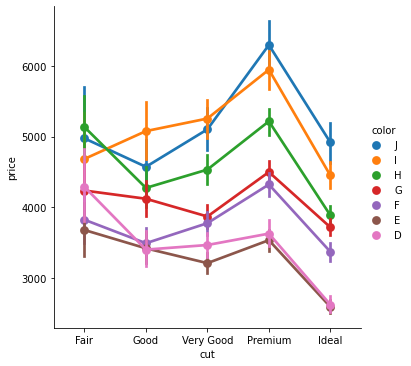

In [76]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df);

## **Boxplot**

#### **Veri Seti Hikayesi**

**total_bill:** yemeğin toplam fiyatı (bahşiş ve vergi dahil)<br>
**tip:** bahşiş<br>
**sex:** ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)<br>
**smoker:** grupta sigara içen var mı? (0=No, 1=Yes)<br>
**day:** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)<br>
**time:** ne zaman? (0=Day, 1=Night)<br>
**size:** grupta kaç kişi var?

In [77]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [79]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [80]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [81]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [82]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

#### **Boxplot**

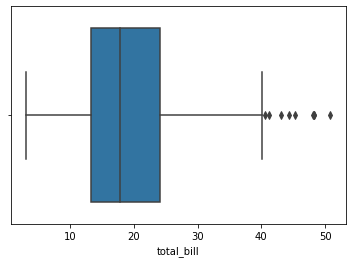

In [83]:
sns.boxplot(x = df["total_bill"]);

Boxplot, bir değerin aykırı değer olarak tanımlanması için<br>
bize en fazla yardımı dokunacak araçlardan birisidir.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


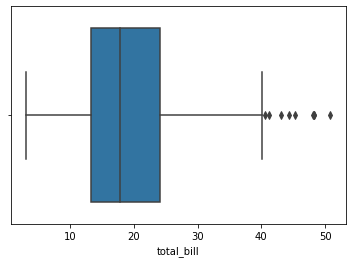

In [84]:
sns.boxplot(x = df["total_bill"], orient="v");
#dikey gözlem
#sns.boxplot(y = df["total_bill"]); ile da yapabiliriz.

#### **Boxplot Caprazlamalar**

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Hangi günler daha fazla kazanıyoruz?

In [86]:
df.groupby("day")["total_bill"].describe().T

day,Thur,Fri,Sat,Sun
count,62.000000,19.000000,87.000000,76.000000
mean,17.682742,17.151579,20.441379,21.410000
std,7.886170,8.302660,9.480419,8.832122
min,7.510000,5.750000,3.070000,7.250000
25%,12.442500,12.095000,13.905000,14.987500
50%,16.200000,15.380000,18.240000,19.630000
75%,20.155000,21.750000,24.740000,25.597500
max,43.110000,40.170000,50.810000,48.170000


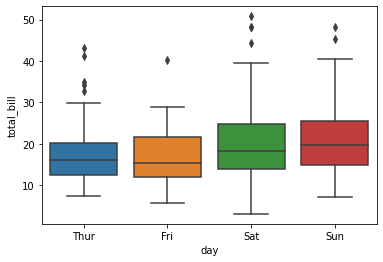

In [87]:
sns.boxplot(x="day", y="total_bill", data=df);

Sabah mı Akşam mı daha çok kazanıyoruz?

In [88]:
df.groupby(["time"])["total_bill"].describe().T

time,Lunch,Dinner
count,68.000000,176.000000
mean,17.168676,20.797159
std,7.713882,9.142029
min,7.510000,3.070000
25%,12.235000,14.437500
50%,15.965000,18.390000
75%,19.532500,25.282500
max,43.110000,50.810000


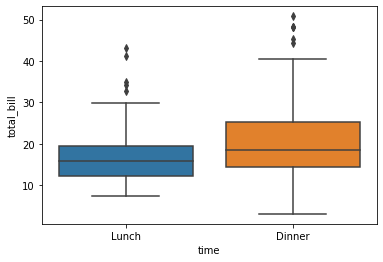

In [89]:
sns.boxplot(x="time", y="total_bill", data=df);

Kişi sayısına göre ödenen fiyat

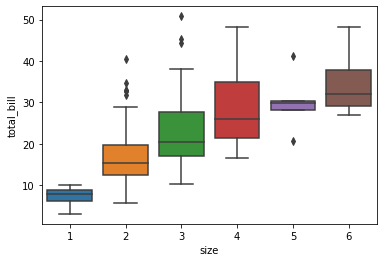

In [90]:
sns.boxplot(x="size", y="total_bill", data=df);

Cinsiyet ve günlere göre ödenen fiyat

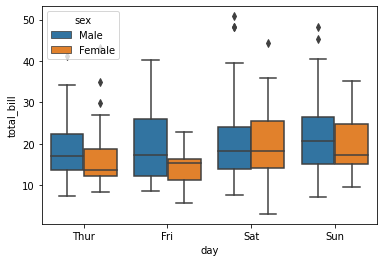

In [91]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=df);

#### **Violin Grafiği**

In [92]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


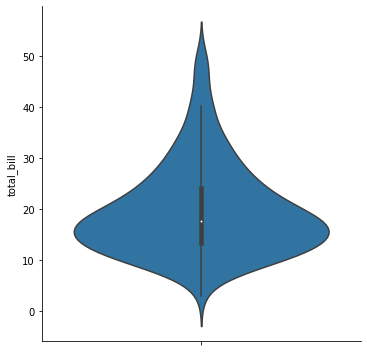

In [93]:
sns.catplot(y = "total_bill", kind = "violin", data=df);

#### **Violin Grafik Çaprazlamalar**

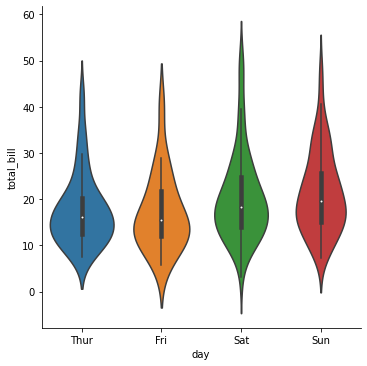

In [94]:
sns.catplot(x="day", y="total_bill", kind="violin", data=df);

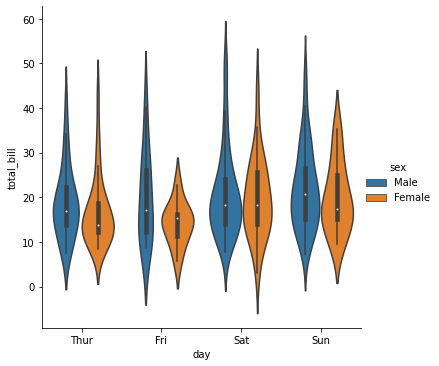

In [95]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=df);

## **Korelasyon Grafikleri**

Korelasyon, değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir.

#### **Scatterplot** (Saçılım Grafiği)

İki değişken arasındaki ilişkiyi ifade etmek için kullanılan ve en çok bilinen yaklaşım **Scatterplot** yaklaşımıdır.

**Scatterplot** bize sayısal değişkenler arasındaki ilişkiyi gösterir.

**total_bill:** yemeğin toplam fiyatı (bahşiş ve vergi dahil)<br>
**tip:** bahşiş<br>
**sex:** ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)<br>
**smoker:** grupta sigara içen var mı? (0=No, 1=Yes)<br>
**day:** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)<br>
**time:** ne zaman? (0=Day, 1=Night)<br>
**size:** grupta kaç kişi var?

In [96]:
import seaborn as sns
tips = sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


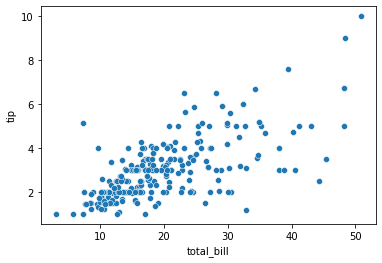

In [97]:
sns.scatterplot(x="total_bill", y="tip", data=df);

Saçılım sağ tarafa gittikçe artmış, yani toplam ödenen tutar<br>
arttıkça bahşiş de artmış diyebiliriz.

#### **Korelasyon Çaprazlamalar**

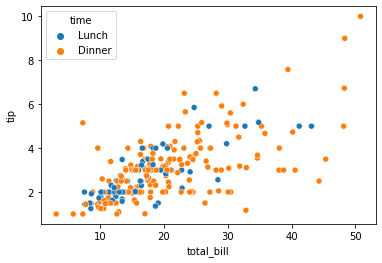

In [98]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df);

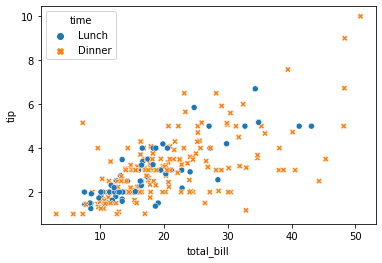

In [99]:
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=df);

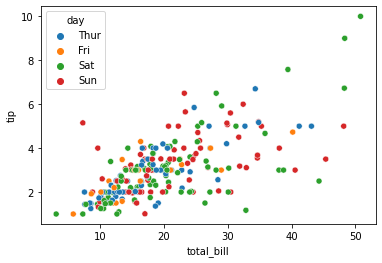

In [100]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df);

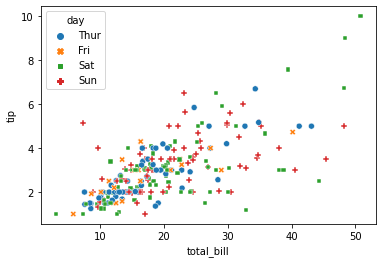

In [101]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="day", data=df);

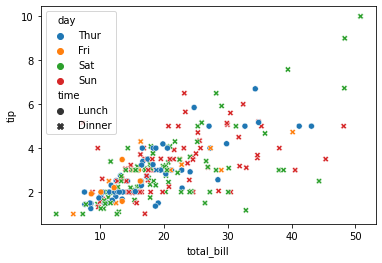

In [102]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=df);

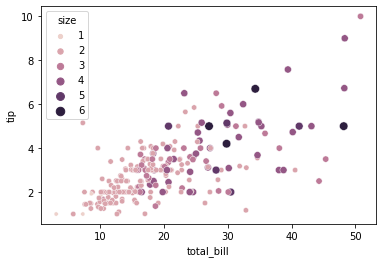

In [103]:
sns.scatterplot(x="total_bill", y="tip", size="size", hue="size", data=df);

## **Doğrusal İlişkinin Gösterilmesi**

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
#bu bölüme özel pyplot fonksiyonunu import ettik.

tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


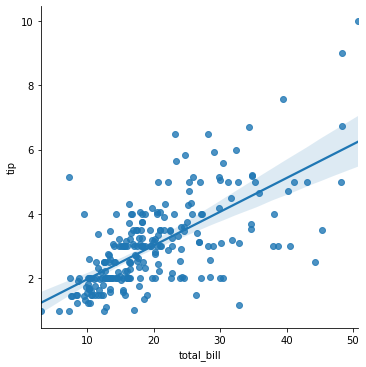

In [105]:
sns.lmplot(x = "total_bill", y = "tip", data=df);
#lmplot = lineer model plot

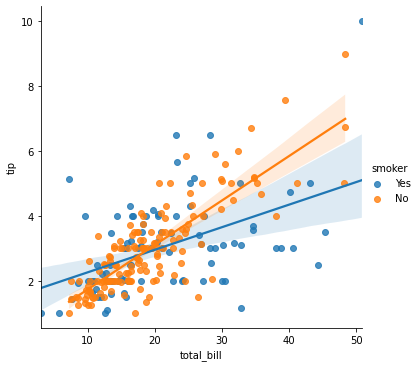

In [106]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df);

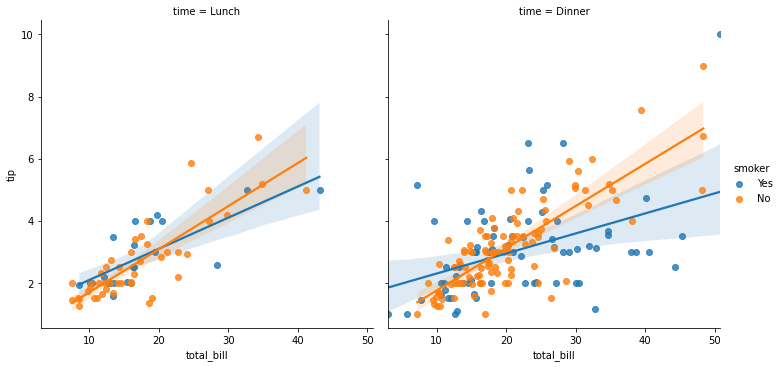

In [107]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df);

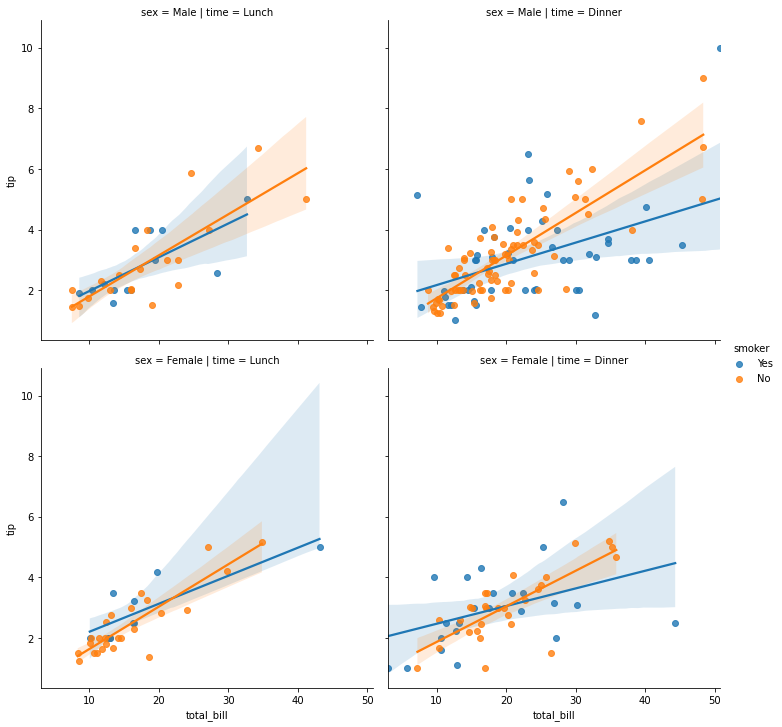

In [108]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=df);

### **Scatterplot Matrisi** (pairplot)

In [109]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [111]:
df.shape

(150, 5)

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [113]:
df.groupby(["species"]).mean().T

species,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


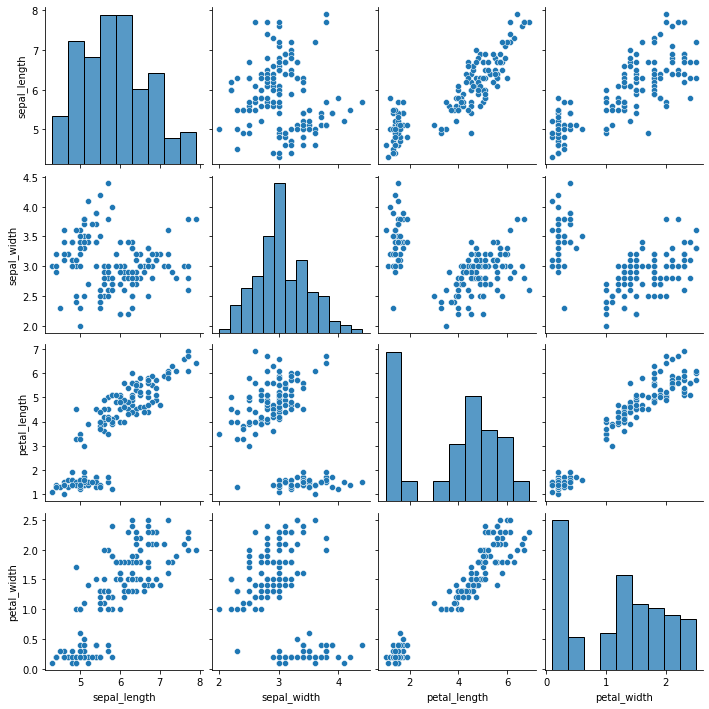

In [114]:
sns.pairplot(df);

Veri setinde yer alan 4 değişkenin birbirleri arasındaki ilişkiler görselleştirilmiş olarak karşımıza geldi.

Eksende yer alan barplot'a benzer grafikler değişkenlerin dağılımlarını göstermektedir.

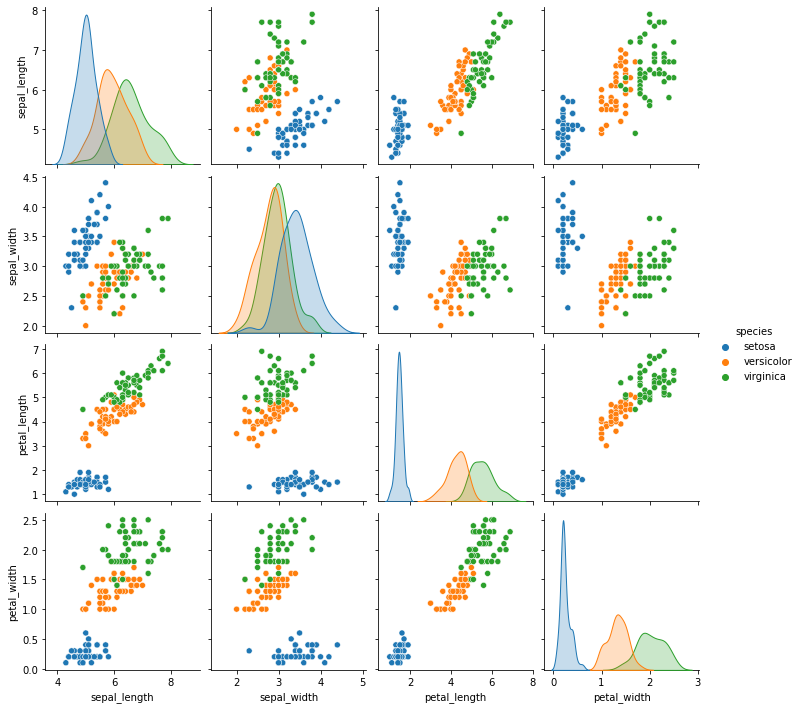

In [115]:
sns.pairplot(df, hue="species");

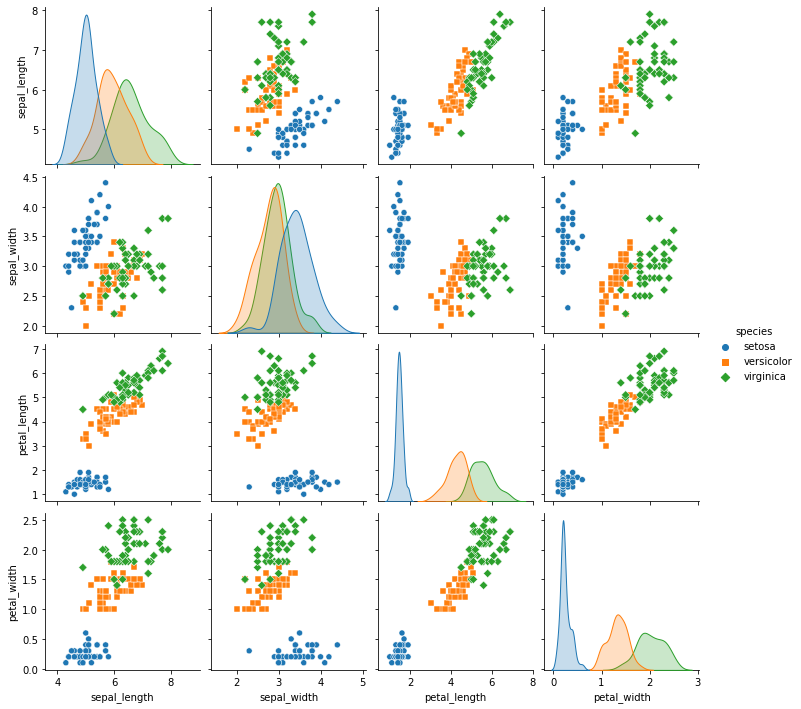

In [116]:
sns.pairplot(df, hue="species", markers = ["o","s","D"]);
#markers, işaret şekilleri için

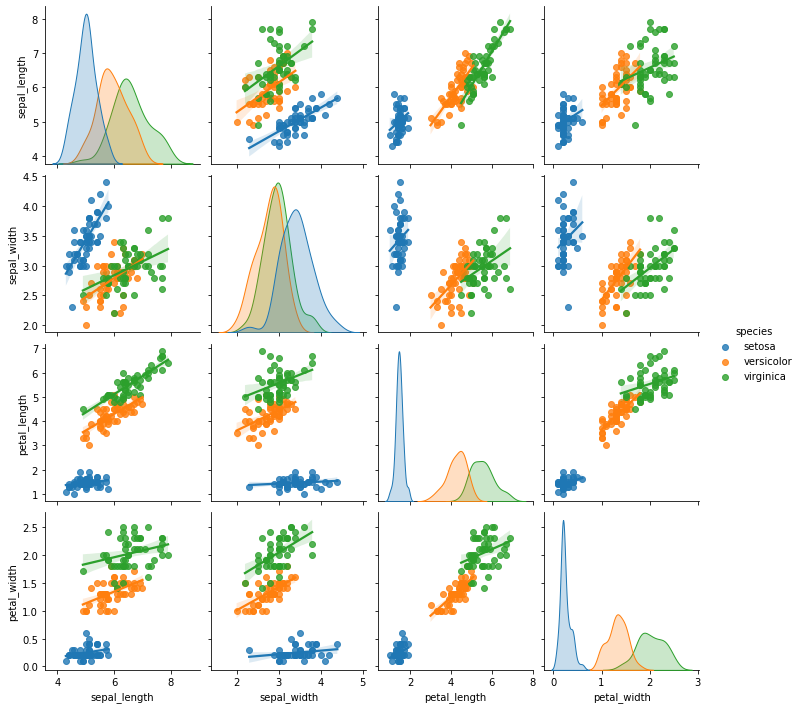

In [117]:
sns.pairplot(df, kind="reg",hue="species");

### **Heat Map** (Isı Haritası)

In [118]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [119]:
df.shape

(144, 3)

In [120]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

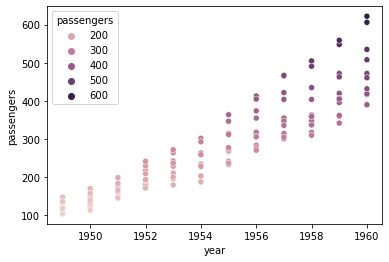

In [121]:
sns.scatterplot(x="year", y="passengers",hue="passengers", data=df);

**Heatmap** bizden daha yapısal tarzda bir veri ister. 

Pivot table şekline getirmeliyiz.

In [122]:
#df.pivot(index=None, columns=None, values=None)
df = df.pivot("month", "year", "passengers")

In [123]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


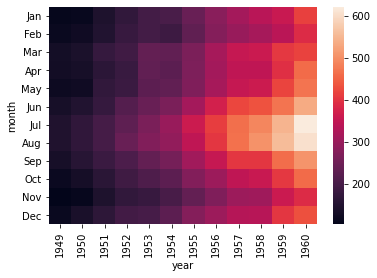

In [124]:
sns.heatmap(df);

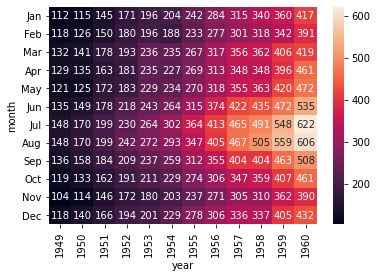

In [125]:
sns.heatmap(df, annot=True, fmt="d");

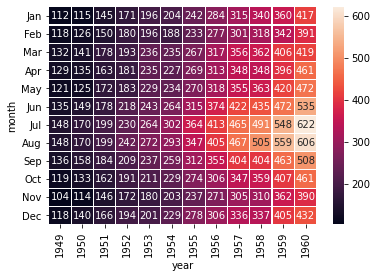

In [126]:
sns.heatmap(df, annot=True, fmt="d", linewidths = .1);
#cbar = False eklersek sağdaki bilgi çubuğu kalkar.

### **Çizgi Grafik** (Lineplot)

#### **Veri Seti Hikayesi**

"fmri" isminde bir veri seti inceleyeceğiz.

Beyine bağlanan bir cihaz aracılığıyla toplanan sinyalleri ifade eden bir veri seti.

**subject:** Verilerin toplandığı kişiler<br>
**timepoint:** Zaman noktaları<br>
**event:** birbirinden farklı olaylar<br>
**region:** sinyalin toplandığı bölge<br>
**signal:** gelen sinyal

In [127]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [128]:
df.shape

(1064, 5)

Amacımız buradaki her bir timepoint'e göre <br>
signal'in durumunu gözlemlemek olsun.

In [129]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [130]:
df.signal.describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [131]:
df.groupby("timepoint")["signal"].count()
#her bir timepoint'deki signal sayilari

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [132]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### **Lineplot Oluşturulması**

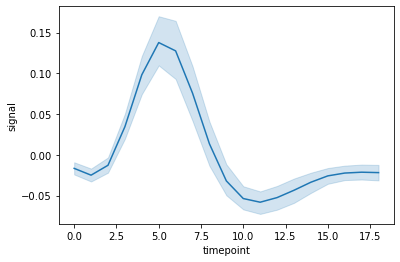

In [133]:
sns.lineplot(x="timepoint", y="signal", data=df);

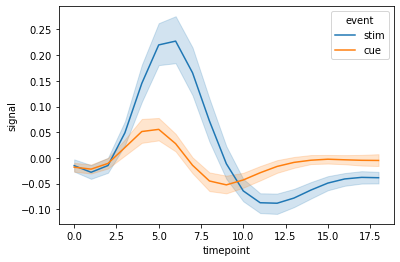

In [134]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=df);

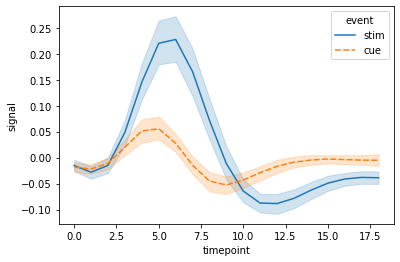

In [135]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=df); 

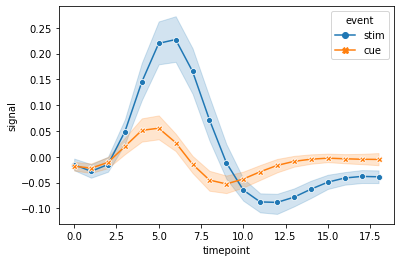

In [136]:
sns.lineplot(x="timepoint", 
             y="signal", 
             hue="event", 
             style="event", 
             markers=True, dashes=False, data=df); 
#markers= ortalamalari isaretler.

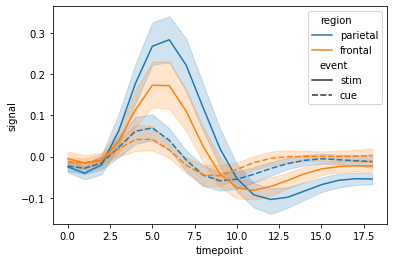

In [137]:
sns.lineplot(x="timepoint", 
             y="signal", 
             hue="region", 
             style="event", 
             data=df); 

## **Basit Zaman Serisi Grafiği**

In [138]:
!pip install pandas_datareader
import pandas_datareader as pr

In [139]:
import pandas as pd

Apple'in borsadaki hisse senedi değerlerini içeren veri setiyle çalışacağız.<br>
Zamana bağlı bir veri setidir.

In [140]:
df = pr.get_data_yahoo("AAPL", start="2016-01-01", end="2019-08-25")

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1451610000&period2=1566781199&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
kapanis = df["Close"]
kapanis.head()

In [ ]:
kapanis.plot()

In [ ]:
kapanis.index
#DatetimeIndex olarak gelmis.

In [ ]:
#DatetimeIndex olmadigi durumlarda düzeltmemiz gerekir.
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [ ]:
kapanis.head()

In [ ]:
kapanis.plot();